<a href="https://colab.research.google.com/github/WoodComb/sleepy-parrot/blob/master/Dog_Cat_Breed_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#pip install fastai2
#pip install nbdev

SyntaxError: ignored

In [2]:
# The Image Classifier methods are present in the vision module. I know that 'import *' is frowned upon, but this is what Jeremy Howard (the 
# creator of fastai and fastai2) recommends for DL Notebooks, so I'm giving it a shot.

from fastai2.vision.all import *
import re

In [3]:
# The untar_data method allows us to download and decompress datasets from URLs(provided by fastai2), or any custom url. 
path = untar_data(URLs.PETS)
path.ls()

(#2) [Path('/root/.fastai/data/oxford-iiit-pet/images'),Path('/root/.fastai/data/oxford-iiit-pet/annotations')]

In [4]:
path = path/'images'

In [5]:
fnames = get_image_files(path)
fnames[:3]

(#3) [Path('/root/.fastai/data/oxford-iiit-pet/images/saint_bernard_168.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/great_pyrenees_147.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Bengal_109.jpg')]

In [6]:
# Function to get the label from fnames
def getLabel(x):
    pat = r'([^/]+)_\d+.jpg$'
    buffer = re.search(pat, str(x))
    label = re.search(r'\w+_', buffer.group())
    return label.group()

In [7]:
# The ImageDataLoader is kind of a swiss knife for loading data; it takes care of batch size, training-validation set creation, item 
# transformations, labeling, etc.
data_loader = ImageDataLoaders.from_name_func(path, fnames, label_func=getLabel, valid_pct=0.2, item_tfms=Resize(224))

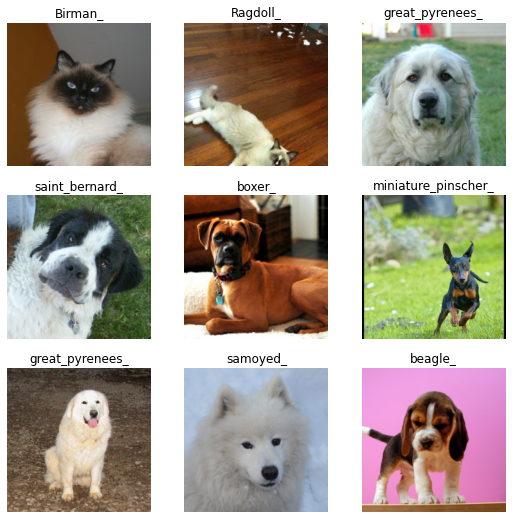

In [8]:
# Lets see some doggos and cattos XD
data_loader.show_batch(max_n=9 )

In [9]:
# Lets create the classifier model. 
model_pets = cnn_learner(data_loader, resnet50,  metrics=[accuracy, error_rate])
# Did not normalize the images explicitly, becaause fastai2 learners select the normalization techniques automatically.

SuggestedLRs(lr_min=0.00831763744354248, lr_steep=0.0020892962347716093)

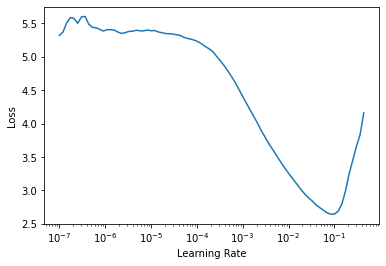

In [10]:
model_pets.lr_find()

In [11]:
# In fit_one_cycle, we'd have to train the model for a few epochs, then unfreeze it, and train again. fine_tune does this automatically.
model_pets.fine_tune(6, freeze_epochs=2)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,1.082421,0.263361,0.916779,0.083221,00:51
1,0.479006,0.294585,0.901218,0.098782,00:51


epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.296798,0.313194,0.909337,0.090663,00:54
1,0.252407,0.318141,0.908660,0.091340,00:54
2,0.192561,0.292108,0.928958,0.071042,00:54
3,0.101818,0.226130,0.941813,0.058187,00:54
4,0.048619,0.194274,0.944520,0.055480,00:54
5,0.025891,0.190036,0.945873,0.054127,00:55


In [12]:
# Lets get the 'Grade Sheet' of the model
perf = ClassificationInterpretation.from_learner(model_pets)

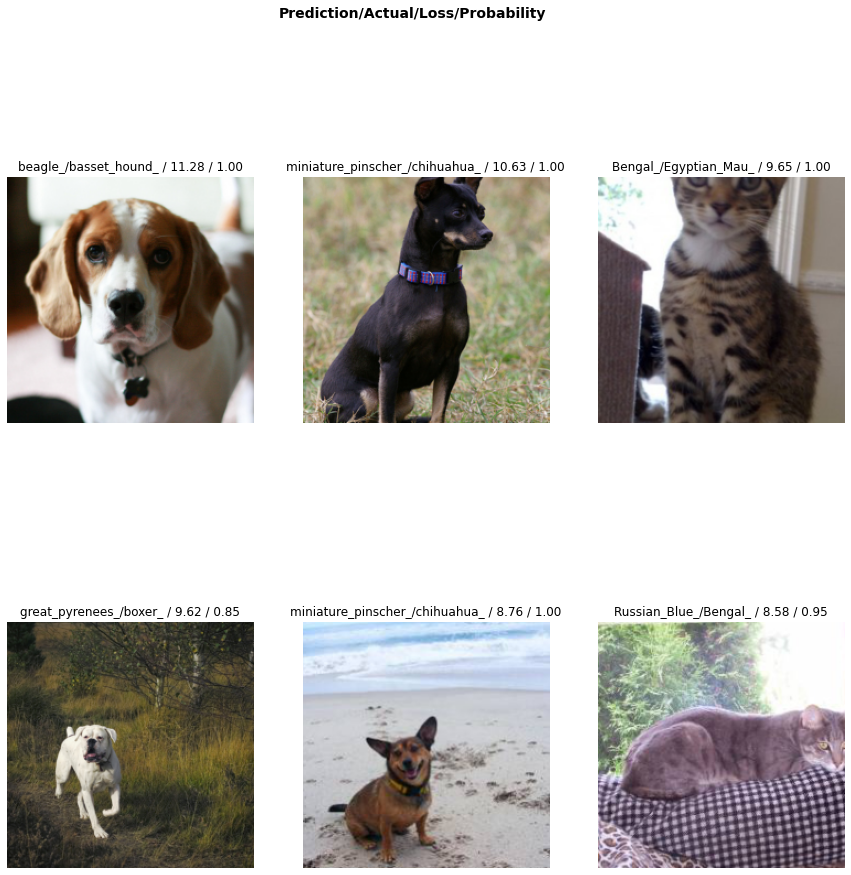

In [13]:
perf.plot_top_losses(6, figsize=(15,15))

In [15]:
perf.print_classification_report()

                             precision    recall  f1-score   support

                Abyssinian_       0.91      0.94      0.92        32
                    Bengal_       0.94      0.90      0.92        50
                    Birman_       0.95      0.91      0.93        44
                    Bombay_       0.92      1.00      0.96        34
         British_Shorthair_       0.93      0.97      0.95        39
              Egyptian_Mau_       0.97      0.93      0.95        41
                Maine_Coon_       0.92      0.94      0.93        36
                   Persian_       0.96      0.96      0.96        27
                   Ragdoll_       0.79      0.88      0.83        25
              Russian_Blue_       0.97      0.93      0.95        42
                   Siamese_       0.98      0.98      0.98        41
                    Sphynx_       0.98      0.98      0.98        52
          american_bulldog_       0.89      0.91      0.90        35
 american_pit_bull_terrier_      

In [16]:
perf.most_confused(4)
# Thats pretty good! Only one breed that was mislabeled more than 4 times. Better than humans XD.

[('american_pit_bull_terrier_', 'staffordshire_bull_terrier_', 5)]